### Script to plot a composite of Rainfall or RH or Temp with Winds by Ekwacu Samuel

In [1]:
# Import existing code modules
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
#uRead wind data
ds = xr.open_dataset('C:/Diabatic_data/WIND/uvwind_mon/uvwind1_1961-2021.nc')  
ds1 = xr.open_dataset('D:/Folder_2023/Research/Frank/Frank_OLD/chirps-v2.0.monthly.nc')
#ds1
#chirps

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
#wspd.lev  # print presure level
ds = ds.sel(lev=85000) #selecting to the pressure level
#ds

In [4]:
ds.coords['lon']=(ds.coords['lon']+180)%360-180
ds=ds.sortby(ds.lon) 

In [5]:
#cropped_ds = ds.sel(X=slice(min_lon,max_lon), Y=slice(min_lat,max_lat))
#cropped_ds1 = ds.sel(longitude=slice(-20,65), latitude=slice(-40,40))
#cropped_ds
#cropped_ds1 = ds1.sel(longitude=slice(-20,65), latitude=slice(-40,40))
#cropped_ds1

In [6]:
obs_clim = ds.sel(time=slice("2015-01-16", "2020-12-16")) #slice ERA5 Wind
obs_clim1 = ds1.sel(time=slice("2015-01-16", "2020-12-16")) #slice CHIRPS RFE
#obs_clim1

In [7]:
####For seasonal analysis OF JRA55 Wind
Data_seas = obs_clim.groupby('time.season')   
#Data_seas
d2 = Data_seas['DJF']
d3 = Data_seas['MAM']
d4 = Data_seas['JJA']
d5 = Data_seas['SON']
#d4

In [15]:
####For yearly analysis
d6=obs_clim.groupby('time.year').mean('time')
#d6

In [9]:
####For seasonal analysis of CHIRPS
obs_seas1 = obs_clim1.groupby('time.season')
## The seasons to plot over
obs_djf1 = obs_seas1['DJF'].mean('time')
obs_mam1 = obs_seas1['MAM'].mean('time')
obs_jja1 = obs_seas1['JJA'].mean('time')
obs_son1 = obs_seas1['SON'].mean('time')
#obs_son

In [11]:
#For seasonal clim CHIRPS
Data_seas1 = obs_clim1.groupby('time.season')   ##Group data into seasonal means for seasonal trends
#Data_seas
d6 = Data_seas1['DJF']
d7 = Data_seas1['MAM']
d8 = Data_seas1['JJA']
d9 = Data_seas1['SON']

In [16]:
#Make an average of the wind variables
wspd_wind = np.mean(np.sqrt(np.add(np.square(d6.u),np.square(d6.v))),axis=0)
u_wind = np.mean(d6.u,axis=0)
v_wind = np.mean(d6.v,axis=0)
#u_wind

In [17]:
#setting up the quiver arguments (these display the wind vectors on the plot)
xx_wind = wspd_wind.lon.values
yy_wind = wspd_wind.lat.values
X_wind,Y_wind =np.meshgrid(xx_wind, yy_wind)
U_wind = u_wind.data
V_wind = v_wind.data

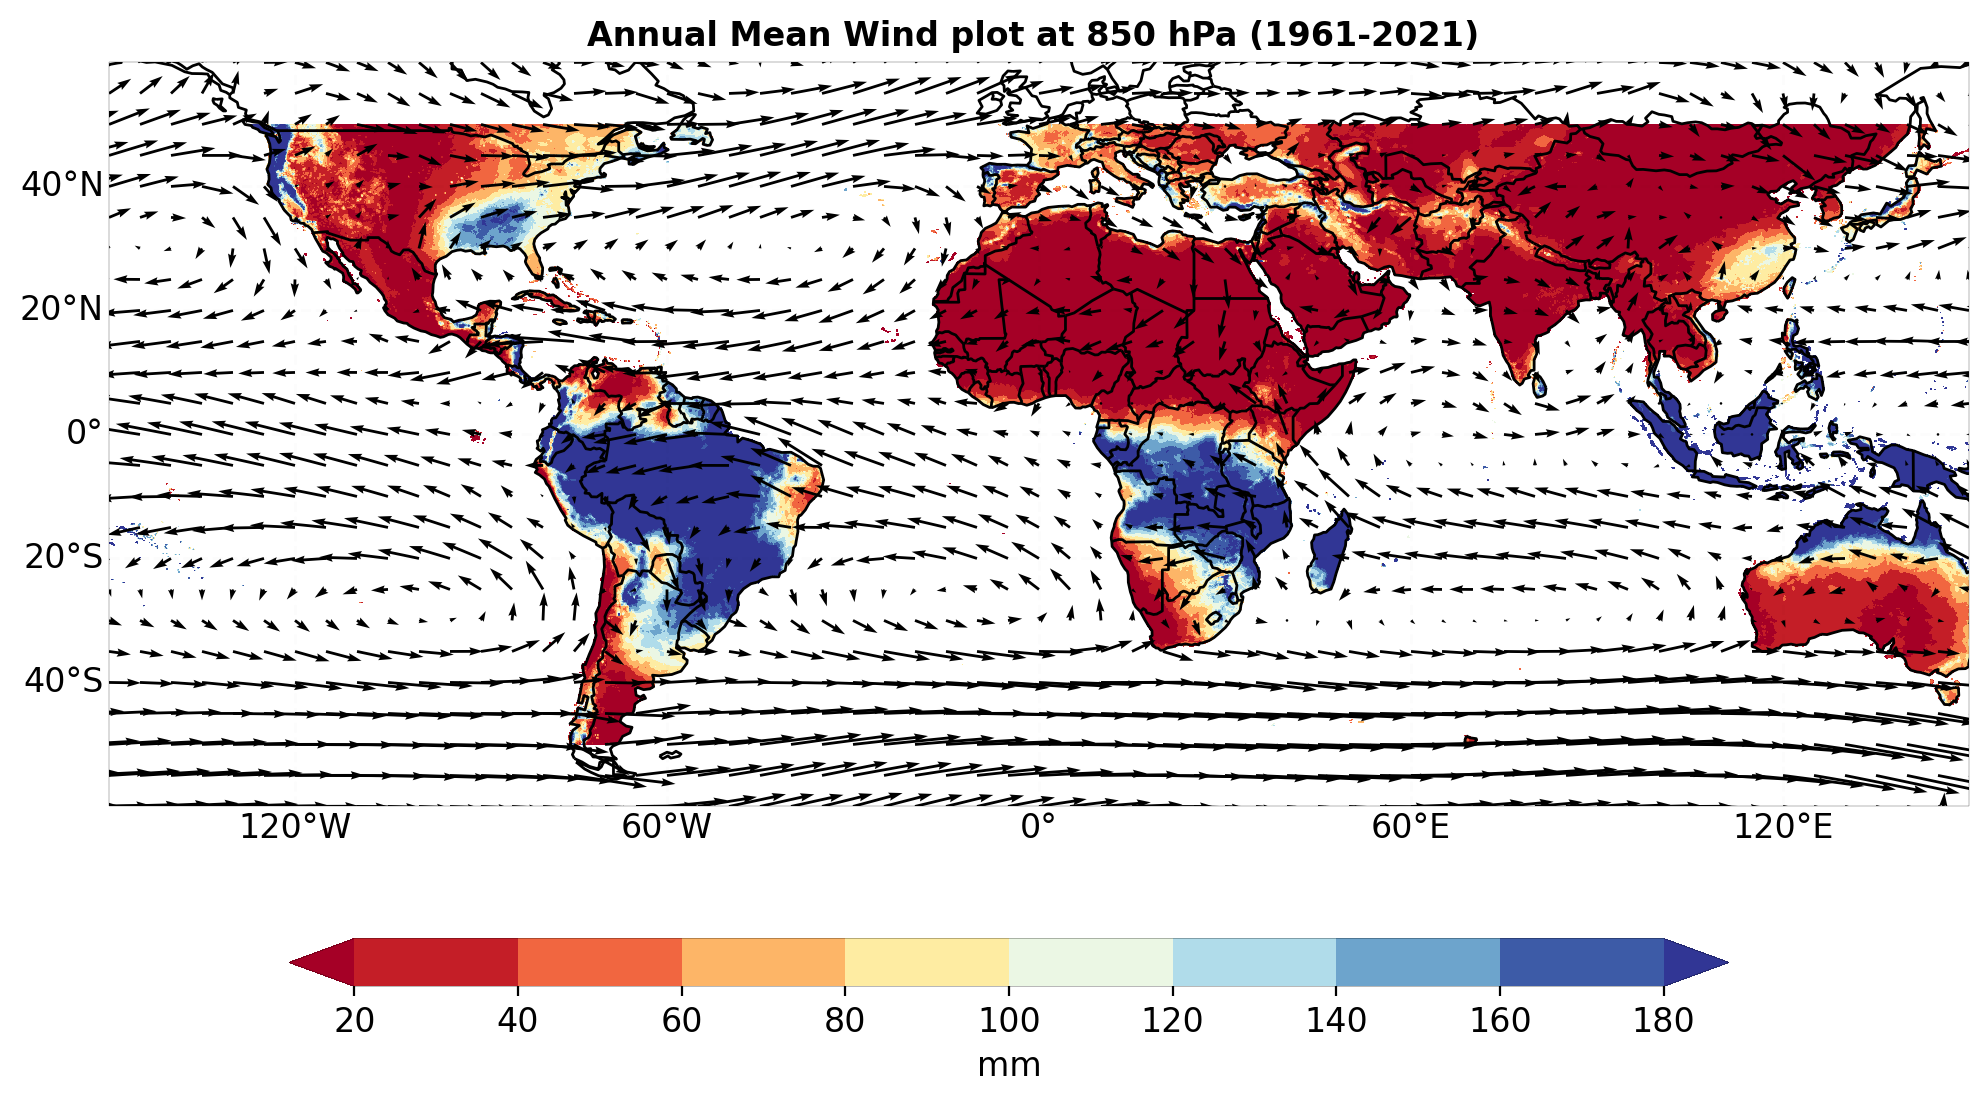

In [28]:
#Plot out the figures
fig=plt.figure(figsize=(12, 8), dpi=200)
mpl.rcParams['font.family'] #= 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 0.1
plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
ax = plt.subplot(projection=ccrs.PlateCarree())
#&&&& Seasonal wind Speed
#speed_plot = plt.pcolormesh(wspd_wind['lon'], wspd_wind['lat'], wspd_wind, cmap='RdBu_r',
#               vmin=0, vmax=15)
#Seasonal Chirps plot
cs = plt.contourf(obs_djf1.longitude, obs_djf1.latitude, obs_djf1.precip, cmap=plt.cm.RdYlBu, levels=np.arange(20, 200, 20), extend='both')
#&&&&seasonal wind direction
plt.quiver(X_wind[::4, ::4], Y_wind[::4, ::4], U_wind[::4, ::4], V_wind[::4, ::4], 
           transform=ccrs.PlateCarree(), color='k', scale=300, width=0.0015,)
#&&&&&&& Seasonal Chirps plot
#cs = plt.contourf(obs_jja1.longitude, obs_jja1.latitude, obs_jja1.precip, cmap=plt.cm.RdYlBu, levels=np.arange(20, 200, 20), extend='both')
lakes_10m = cfeature.NaturalEarthFeature('physical','lakes','10m')
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE, linewidth=1)
#ax.add_feature(lakes_10m, facecolor='none', edgecolor='k')
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
plt.xlim([-150, 150])
plt.ylim([-60, 60])
#ax.set_xticks(range(-150, 170, 50), crs=ccrs.PlateCarree(central_longitude=0))
#ax.set_yticks(range(-60, 80, 20), crs=ccrs.PlateCarree(central_longitude=0))

plt.title('Annual Mean Wind plot at 850 hPa (1961-2021) ',fontsize=12, fontweight='bold')
plt.ylabel('Latitude',fontsize=12, fontweight='bold')
plt.xlabel('Longitude',fontsize=12, fontweight='bold')
#&&&&&For Wind Speed
#colorbar_axes = plt.gcf().add_axes([0.2, 0.2, 0.6, 0.03])
#plt.colorbar(speed_plot, colorbar_axes, label='m/s', orientation='horizontal')
#&&&& For vertical scale
#plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
#fig.colorbar(cs, ax=ax,cax = plt.axes([0.70, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')

colorbar_axes = plt.gcf().add_axes([0.2, 0.15, 0.6, 0.03]) #(left,up/down )
plt.colorbar(cs, colorbar_axes, label='mm', orientation='horizontal')
#&&&&For Horizontal scale.
#cax = fig.add_axes([0.19, 0.30, 0.7, 0.01])   ## [left, bottom, width, height]
#cb = plt.colorbar(cs, cax, orientation='horizontal', extend = 'both')
#cb.set_label('mm season$^{-1}$', fontsize = 12, labelpad = -1)  
#plt.savefig('C:/ERSSTv5/wind/MAM_RFE-wind_850hpa.png')
#plt.savefig('C:/Diabatic_data/WIND/uvwind_mon/JRA55_Mean_PHE_active-Inactive.png', dpi=300)
plt.show()

## God is Great